## 회귀분석

In [1]:
import pandas as pd

In [2]:
anal_df = pd.read_csv("C:/data/now_used/1015_data2.csv")
anal_df.head(5)

,건축물대장코드,구시군,읍면동,번,지,입주일,상가유형,지하총층,지상총층,연면적m2,...,아파트거리,주변세대수점수,주변평당가점수,상권코드명,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,공시지가
0,11110-10014,종로구,동숭동,1,114,1982-12-24,근린상가,1,5,1563.66,...,519.940374,1.176,10.477,이화장길,1276469803,92138,926358383,350111420,131091.221409,22840000
1,11110-100180009,종로구,동숭동,1,67,2008-07-03,기타상가,4,5,8585.08,...,497.856179,1.207,10.754,이화장길,1276469803,92138,926358383,350111420,66131.584897,16310000
2,11110-100184402,종로구,관훈동,186,0,2008-12-29,근린상가,0,3,172.11,...,249.441747,0.363,19.104,계동길,725431028,41102,530637184,194793844,101021.253105,24600000
3,11110-100190514,종로구,누하동,245,6,2011-09-28,근린상가,0,4,233.03,...,426.832578,1.979,16.353,자하문로7길,1266093633,59989,952608422,313485211,67634.444078,7727000
4,11110-100190842,종로구,효제동,19,3,2011-10-14,근린상가,0,5,253.80,...,491.694446,0.810,10.063,율곡로16길,701283928,59235,586470792,114813136,112721.417069,4878000


In [3]:
# 더미변수 추가
from pandas import get_dummies

type_dummies = pd.get_dummies(anal_df['상가유형'], prefix = 'type')

anal_df = pd.concat([anal_df, type_dummies], axis = 1)

lst = []
[lst.append(1) if i > 0 else lst.append(0) for i in anal_df['주차대수']]

anal_df['주차가능여부'] = lst

lst = []
[lst.append(1) if i > 0 else lst.append(0) for i in anal_df['승강기수']]

anal_df['승강기여부'] = lst

In [4]:
anal_df.columns

Index(['건축물대장코드', '구시군', '읍면동', '번', '지', '입주일', '상가유형', '지하총층', '지상총층',
       '연면적m2', '주차대수', '승강기수', '경도', '위도', 'usage_area', 'cont_area', 'RENT',
       'rent_ua', 'rent_ca', 'floor', '전철역명', '지하철거리m', '승객수점수', '건물별전기사용량',
       '본번별평균사용량', '횡단보도거리m', '건물연차', '가까운아파트', '가까운아파트총세대수', '가까운아파트평균평당가',
       '아파트거리', '주변세대수점수', '주변평당가점수', '상권코드명', '평균월매출금액', '평균월매출건수',
       '평균주중매출금액', '평균주말매출금액', '편의점임대료', '공시지가', 'type_근린상가', 'type_기타상가',
       'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부'],
      dtype='object')

In [5]:
print(len(anal_df), len(anal_df['건축물대장코드'].unique()))

9262 9262


In [6]:
anal_df = anal_df[['건축물대장코드', '지하총층', '지상총층','연면적m2', '주차대수',
                   '승강기수', 'usage_area', 'cont_area',
       'rent_ua','지하철거리m', '승객수점수',
       '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가', 
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수', '상권코드명',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료','type_근린상가', 'type_기타상가',
       'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부']]

In [7]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     184.7
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:31:31   Log-Likelihood:                -22537.
No. Observations:                9262   AIC:                         4.513e+04
Df Residuals:                    9232   BIC:                         4.535e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9671      0.246      8.008      0.000       1.486       2.449
usage_area     -0.0005   4.83e-05     -9.941      0.000      -0.001      -0.000
cont_area   -2.226e-06   4.48e-06     -0.497      0.619    -1.1e-05    6.56e-06
지하총층           -0.1221      0.049     -2.506      0.012      -0.218      -0.027
지상총층           -0.0425      0.019     -2.228      0.026      -0.080      -0.005
연면적m2       -1.305e-05   1.89e-05     -0.690      0.490   -5.01e-05     2.4e-05
주차대수           -0.0007      0.002     -0.420      0.675      -0.004       0.002
승강기수            0.1649      0.065      2.521      0.012       0.037       0.293
지하철거리m         -0.0311      0.011     -2.953      0.003      -0.052      -0.010
승객수점수        3.953e-06   4.95e-07      7.985      0.000    2.98e-06    4.92e-06
횡단보도거리m        -0.0022      0.001     -3.165      0.002      -0.004      -0.001
건물별전기사용량     4.181e-06   1.13e-06      3.702      0.000    1.97e-06    6.39e-06
본번별평균사용량     2.739e-06   7.91e-07      3.463      0.001    1.19e-06    4.29e-06
건물연차           -0.0093      0.003     -2.847      0.004      -0.016      -0.003
공시지가         3.148e-07   6.47e-09     48.654      0.000    3.02e-07    3.27e-07
가까운아파트총세대수      0.0001    7.2e-05      1.869      0.062   -6.59e-06       0.000
가까운아파트평균평당가    -0.0001   3.28e-05     -4.250      0.000      -0.000   -7.51e-05
아파트거리          -0.0002      0.000     -1.006      0.314      -0.001       0.000
주변세대수점수         0.0329      0.010      3.346      0.001       0.014       0.052
주변평당가점수        -0.0027      0.001     -2.288      0.022      -0.005      -0.000
평균월매출금액      1.602e-10   2.87e-11      5.582      0.000    1.04e-10    2.16e-10
평균월매출건수     -5.576e-06   1.49e-06     -3.738      0.000    -8.5e-06   -2.65e-06
평균주중매출금액     4.631e-11   4.39e-11      1.055      0.291   -3.97e-11    1.32e-10
평균주말매출금액     1.535e-09   2.34e-10      6.545      0.000    1.08e-09    1.99e-09
편의점임대료       3.271e-06   5.57e-07      5.876      0.000    2.18e-06    4.36e-06
type_근린상가       0.6669      0.176      3.800      0.000       0.323       1.011
type_기타상가      -0.1900      0.177     -1.072      0.284      -0.537       0.157
type_단지내상가      2.0845      0.510      4.089      0.000       1.085       3.084
type_복합상가      -0.5943      0.347     -1.715      0.086      -1.274       0.085
주차가능여부         -0.2253      0.070     -3.211      0.001      -0.363      -0.088
승강기여부           0.2965      0.113      2.625      0.009       0.075       0.518
==============================================================================
Omnibus:                     7693.969   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           509513.326
Skew:                           3.563   Prob(JB):                         0.00
Kurtosis:                      38.630   Cond. N

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x2cdd10891c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cdd1089880>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cdd1077e20>],
 'medians': [<matplotlib.lines.Line2D at 0x2cdd1089f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cdd1095280>],
 'means': []}

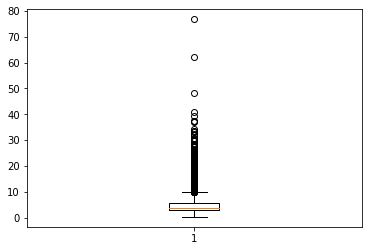

In [9]:
# rent_ua 이상치 파악

min = np.percentile(anal_df['rent_ua'],0)
q1 = np.percentile(anal_df['rent_ua'],25)
q2 = np.percentile(anal_df['rent_ua'],50)
q3 = np.percentile(anal_df['rent_ua'],75)
max = np.percentile(anal_df['rent_ua'],100)

IQR = q3 - q1
iqr = q3 - q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr


plt.boxplot(anal_df['rent_ua'])

## rent_ua 컬럼 이상치 제거

In [10]:
# rent_ua 이상치 제거
anal_df2 = anal_df.copy()

q1 = anal_df2['rent_ua'].quantile(0.25)
q3 = anal_df2['rent_ua'].quantile(0.75)
iqt = 1.5 * (q3-q1)

In [11]:
anal_df2.columns

Index(['건축물대장코드', '지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area',
       'cont_area', 'rent_ua', '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량',
       '횡단보도거리m', '건물연차', '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리',
       '주변세대수점수', '주변평당가점수', '상권코드명', '평균월매출금액', '평균월매출건수', '평균주중매출금액',
       '평균주말매출금액', '편의점임대료', 'type_근린상가', 'type_기타상가', 'type_단지내상가',
       'type_복합상가', '주차가능여부', '승강기여부'],
      dtype='object')

In [12]:
z = anal_df2[[ '지하총층', '지상총층','연면적m2', '주차대수',
                   '승강기수', 'usage_area', 'cont_area',
       'rent_ua','지하철거리m', '승객수점수',
       '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가', 
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료', 'type_근린상가', 'type_기타상가',
       'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부']]

In [13]:
z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
z

<ipython-input-13-5b6fb51fab7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
C:\python\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
0,1,5,1563.66,0,1,15.50,15.50,NaN,1.082077,71533.898,...,92138,926358383,350111420,131091.221409,1,0,0,0,0,1
1,4,5,8585.08,7,4,103.00,143.92,NaN,1.373136,117064.164,...,92138,926358383,350111420,66131.584897,0,1,0,0,1,1
2,0,3,172.11,0,1,185.00,200.00,NaN,2.508637,46623.003,...,41102,530637184,194793844,101021.253105,1,0,0,0,0,1
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,59989,952608422,313485211,67634.444078,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,59235,586470792,114813136,112721.417069,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,14458,184722166,53052568,157349.896480,1,0,0,0,1,0
9258,1,3,988.04,0,0,41.19,41.19,NaN,0.729846,33569.452,...,61110,811089104,327426355,37556.499110,1,0,0,0,0,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,61110,811089104,327426355,37556.499110,1,0,0,0,1,0
9260,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,43065,546770943,184632806,39411.064842,1,0,0,0,1,0


In [14]:
z.isnull().sum()

지하총층             0
지상총층             0
연면적m2            0
주차대수             0
승강기수             0
usage_area       0
cont_area        0
rent_ua        542
지하철거리m           0
승객수점수            0
건물별전기사용량         0
본번별평균사용량         0
횡단보도거리m          0
건물연차             0
공시지가             0
가까운아파트총세대수       0
가까운아파트평균평당가      0
아파트거리            0
주변세대수점수          0
주변평당가점수          0
평균월매출금액          0
평균월매출건수          0
평균주중매출금액         0
평균주말매출금액         0
편의점임대료           0
type_근린상가        0
type_기타상가        0
type_단지내상가       0
type_복합상가        0
주차가능여부           0
승강기여부            0
dtype: int64

In [15]:
z = z.dropna(axis = 0, how = 'any')
z.isnull().sum()

지하총층           0
지상총층           0
연면적m2          0
주차대수           0
승강기수           0
usage_area     0
cont_area      0
rent_ua        0
지하철거리m         0
승객수점수          0
건물별전기사용량       0
본번별평균사용량       0
횡단보도거리m        0
건물연차           0
공시지가           0
가까운아파트총세대수     0
가까운아파트평균평당가    0
아파트거리          0
주변세대수점수        0
주변평당가점수        0
평균월매출금액        0
평균월매출건수        0
평균주중매출금액       0
평균주말매출금액       0
편의점임대료         0
type_근린상가      0
type_기타상가      0
type_단지내상가     0
type_복합상가      0
주차가능여부         0
승강기여부          0
dtype: int64

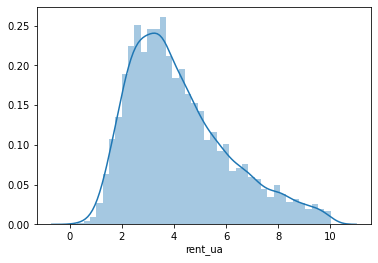

In [16]:
sns.distplot(z.iloc[:,7])
plt.show()

In [17]:
import scipy as sp
import scipy.stats as stats

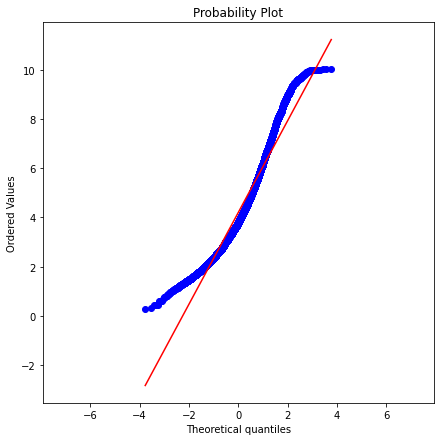

In [18]:
x = z.iloc[:,7]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

In [19]:
# 이상값 다시 제거

q1 = z["rent_ua"].quantile(0.25)
q3 = z["rent_ua"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z1 = z.copy()
z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None
z1

<ipython-input-19-02376eca61ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,59989,952608422,313485211,67634.444078,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,59235,586470792,114813136,112721.417069,1,0,0,0,0,0
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,92138,926358383,350111420,85005.100306,0,1,0,0,1,1
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,41102,530637184,194793844,112503.643253,1,0,0,0,1,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,82393,810808853,321931432,95483.870968,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,45138,598585337,246834320,38862.980235,1,0,0,0,1,0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,14458,184722166,53052568,157349.896480,1,0,0,0,1,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,61110,811089104,327426355,37556.499110,1,0,0,0,1,0
9260,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,43065,546770943,184632806,39411.064842,1,0,0,0,1,0


In [20]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 3 to 9261
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8720 non-null   int64  
 1   지상총층         8720 non-null   int64  
 2   연면적m2        8720 non-null   float64
 3   주차대수         8720 non-null   int64  
 4   승강기수         8720 non-null   int64  
 5   usage_area   8720 non-null   float64
 6   cont_area    8720 non-null   float64
 7   rent_ua      8563 non-null   float64
 8   지하철거리m       8720 non-null   float64
 9   승객수점수        8720 non-null   float64
 10  건물별전기사용량     8720 non-null   int64  
 11  본번별평균사용량     8720 non-null   float64
 12  횡단보도거리m      8720 non-null   float64
 13  건물연차         8720 non-null   int64  
 14  공시지가         8720 non-null   int64  
 15  가까운아파트총세대수   8720 non-null   int64  
 16  가까운아파트평균평당가  8720 non-null   float64
 17  아파트거리        8720 non-null   float64
 18  주변세대수점수      8720 non-null   float64
 19  주변평당가점

In [21]:
z1 = z1.dropna(axis = 0, how = 'any')
z1

,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,59989,952608422,313485211,67634.444078,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,59235,586470792,114813136,112721.417069,1,0,0,0,0,0
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,92138,926358383,350111420,85005.100306,0,1,0,0,1,1
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,41102,530637184,194793844,112503.643253,1,0,0,0,1,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,82393,810808853,321931432,95483.870968,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,45138,598585337,246834320,38862.980235,1,0,0,0,1,0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,14458,184722166,53052568,157349.896480,1,0,0,0,1,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,61110,811089104,327426355,37556.499110,1,0,0,0,1,0
9260,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,43065,546770943,184632806,39411.064842,1,0,0,0,1,0


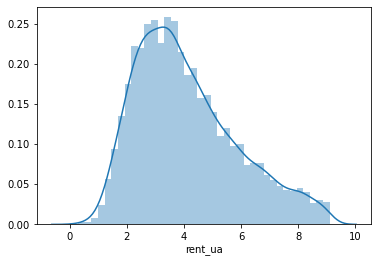

In [22]:
sns.distplot(z1.iloc[:,7])
plt.show()

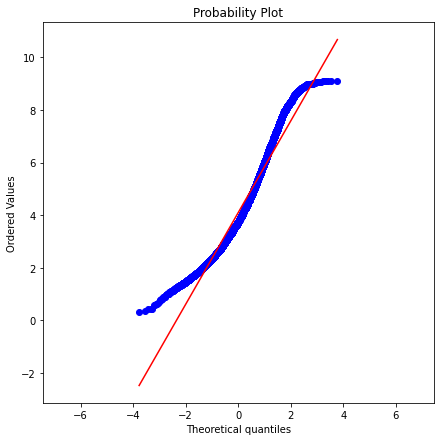

In [23]:
x = z1.iloc[:,7]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

## 상관계수 히트맵 그려보기

In [24]:
# 상관계수 확인

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

# 스피어만 상관계수

corr_ua_s = z1.corr(method = 'spearman')
corr_ua_s

,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
지하총층,1.000000,0.474845,0.575411,0.310545,0.372233,0.177908,0.216480,0.115560,-0.006472,0.152229,...,0.055534,0.083255,0.061713,0.132663,-0.412911,0.338781,0.079730,0.232124,0.213229,0.338607
지상총층,0.474845,1.000000,0.725013,0.558848,0.620730,0.255147,0.288443,0.155214,-0.020228,0.173070,...,0.119241,0.141506,0.108190,0.151624,-0.405357,0.348513,0.067964,0.191363,0.485987,0.611718
연면적m2,0.575411,0.725013,1.000000,0.571064,0.549044,0.306538,0.350283,0.177112,0.005932,0.147092,...,0.076554,0.114244,0.077690,0.140220,-0.446387,0.392991,0.066816,0.190403,0.415303,0.534493
주차대수,0.310545,0.558848,0.571064,1.000000,0.453533,0.208470,0.236113,0.086560,0.041764,0.063499,...,0.062945,0.093308,0.084919,0.094971,-0.244339,0.179982,0.056156,0.185896,0.888412,0.438523
승강기수,0.372233,0.620730,0.549044,0.453533,1.000000,0.244907,0.275890,0.183578,-0.043667,0.174911,...,0.092296,0.123879,0.092000,0.149497,-0.402780,0.324594,0.083448,0.239207,0.341575,0.993957
usage_area,0.177908,0.255147,0.306538,0.208470,0.244907,1.000000,0.970796,0.042477,-0.057932,0.274192,...,0.159812,0.191173,0.189792,0.145685,-0.155979,0.148483,0.007125,0.044253,0.173963,0.248884
cont_area,0.216480,0.288443,0.350283,0.236113,0.275890,0.970796,1.000000,0.082693,-0.058046,0.286391,...,0.161847,0.196044,0.190876,0.161154,-0.197023,0.180403,0.009849,0.073674,0.190946,0.275399
rent_ua,0.115560,0.155214,0.177112,0.086560,0.183578,0.042477,0.082693,1.000000,-0.228621,0.349202,...,0.268944,0.285700,0.293223,0.299452,-0.143748,0.118957,0.040144,0.073691,0.045416,0.175310
지하철거리m,-0.006472,-0.020228,0.005932,0.041764,-0.043667,-0.057932,-0.058046,-0.228621,1.000000,-0.471876,...,-0.242985,-0.241281,-0.215861,-0.259660,0.064017,-0.063272,-0.009261,-0.009938,0.059545,-0.040728
승객수점수,0.152229,0.173070,0.147092,0.063499,0.174911,0.274192,0.286391,0.349202,-0.471876,1.000000,...,0.455541,0.446685,0.397073,0.343167,-0.174308,0.148046,0.021762,0.089628,0.032128,0.169657


In [25]:
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/windows/fonts/malgun.ttf').get_name()
rc('font', family = font_name)

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


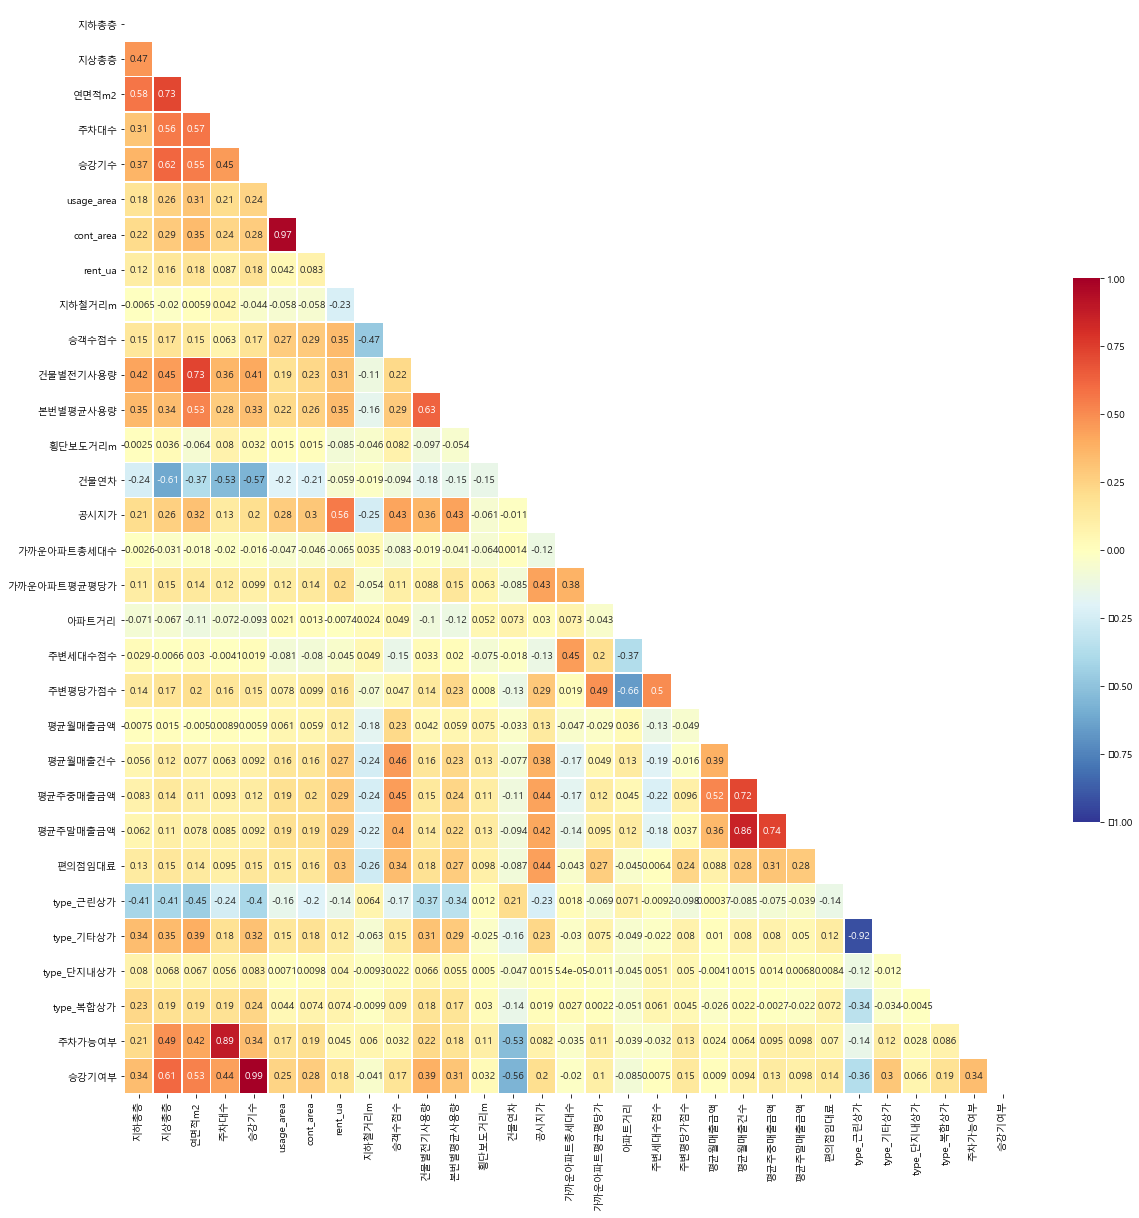

In [26]:
# 스피어만 상관계수 히트맵

mask = np.zeros_like(corr_ua_s, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(20,20) )

sns.heatmap(corr_ua_s,
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [27]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     184.7
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:31:34   Log-Likelihood:                -22537.
No. Observations:                9262   AIC:                         4.513e+04
Df Residuals:                    9232   BIC:                         4.535e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9671      0.246      8.008      0.000       1.486       2.449
usage_area     -0.0005   4.83e-05     -9.941      0.000      -0.001      -0.000
cont_area   -2.226e-06   4.48e-06     -0.497      0.619    -1.1e-05    6.56e-06
지하총층           -0.1221      0.049     -2.506      0.012      -0.218      -0.027
지상총층           -0.0425      0.019     -2.228      0.026      -0.080      -0.005
연면적m2       -1.305e-05   1.89e-05     -0.690      0.490   -5.01e-05     2.4e-05
주차대수           -0.0007      0.002     -0.420      0.675      -0.004       0.002
승강기수            0.1649      0.065      2.521      0.012       0.037       0.293
지하철거리m         -0.0311      0.011     -2.953      0.003      -0.052      -0.010
승객수점수        3.953e-06   4.95e-07      7.985      0.000    2.98e-06    4.92e-06
횡단보도거리m        -0.0022      0.001     -3.165      0.002      -0.004      -0.001
건물별전기사용량     4.181e-06   1.13e-06      3.702      0.000    1.97e-06    6.39e-06
본번별평균사용량     2.739e-06   7.91e-07      3.463      0.001    1.19e-06    4.29e-06
건물연차           -0.0093      0.003     -2.847      0.004      -0.016      -0.003
공시지가         3.148e-07   6.47e-09     48.654      0.000    3.02e-07    3.27e-07
가까운아파트총세대수      0.0001    7.2e-05      1.869      0.062   -6.59e-06       0.000
가까운아파트평균평당가    -0.0001   3.28e-05     -4.250      0.000      -0.000   -7.51e-05
아파트거리          -0.0002      0.000     -1.006      0.314      -0.001       0.000
주변세대수점수         0.0329      0.010      3.346      0.001       0.014       0.052
주변평당가점수        -0.0027      0.001     -2.288      0.022      -0.005      -0.000
평균월매출금액      1.602e-10   2.87e-11      5.582      0.000    1.04e-10    2.16e-10
평균월매출건수     -5.576e-06   1.49e-06     -3.738      0.000    -8.5e-06   -2.65e-06
평균주중매출금액     4.631e-11   4.39e-11      1.055      0.291   -3.97e-11    1.32e-10
평균주말매출금액     1.535e-09   2.34e-10      6.545      0.000    1.08e-09    1.99e-09
편의점임대료       3.271e-06   5.57e-07      5.876      0.000    2.18e-06    4.36e-06
type_근린상가       0.6669      0.176      3.800      0.000       0.323       1.011
type_기타상가      -0.1900      0.177     -1.072      0.284      -0.537       0.157
type_단지내상가      2.0845      0.510      4.089      0.000       1.085       3.084
type_복합상가      -0.5943      0.347     -1.715      0.086      -1.274       0.085
주차가능여부         -0.2253      0.070     -3.211      0.001      -0.363      -0.088
승강기여부           0.2965      0.113      2.625      0.009       0.075       0.518
==============================================================================
Omnibus:                     7693.969   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           509513.326
Skew:                           3.563   Prob(JB):                         0.00
Kurtosis:                      38.630   Cond. N

## 주요컬럼 이상치 제거
상관계수가 0.3 이상인 변수의 이상치를 제거한다.
* 승객수점수, 건물별전기사용량, 본번별평균사용량, 공시지가, 편의점임대료

In [28]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8563 entries, 3 to 9261
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8563 non-null   int64  
 1   지상총층         8563 non-null   int64  
 2   연면적m2        8563 non-null   float64
 3   주차대수         8563 non-null   int64  
 4   승강기수         8563 non-null   int64  
 5   usage_area   8563 non-null   float64
 6   cont_area    8563 non-null   float64
 7   rent_ua      8563 non-null   float64
 8   지하철거리m       8563 non-null   float64
 9   승객수점수        8563 non-null   float64
 10  건물별전기사용량     8563 non-null   int64  
 11  본번별평균사용량     8563 non-null   float64
 12  횡단보도거리m      8563 non-null   float64
 13  건물연차         8563 non-null   int64  
 14  공시지가         8563 non-null   int64  
 15  가까운아파트총세대수   8563 non-null   int64  
 16  가까운아파트평균평당가  8563 non-null   float64
 17  아파트거리        8563 non-null   float64
 18  주변세대수점수      8563 non-null   float64
 19  주변평당가점

In [29]:
# 승객수점수 이상값 제거

q1 = z1["승객수점수"].quantile(0.25)
q3 = z1["승객수점수"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z2 = z1.copy()
z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None

z2 = z2.dropna(axis = 0, how= 'any')
z2

<ipython-input-29-1eb64b94a9ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,59989,952608422,313485211,67634.444078,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,59235,586470792,114813136,112721.417069,1,0,0,0,0,0
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,92138,926358383,350111420,85005.100306,0,1,0,0,1,1
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,41102,530637184,194793844,112503.643253,1,0,0,0,1,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,82393,810808853,321931432,95483.870968,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,45138,598585337,246834320,38862.980235,1,0,0,0,1,0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,14458,184722166,53052568,157349.896480,1,0,0,0,1,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,61110,811089104,327426355,37556.499110,1,0,0,0,1,0
9260,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,43065,546770943,184632806,39411.064842,1,0,0,0,1,0


In [30]:
# 건물별전기사용량 이상값 제거

q1 = z2["건물별전기사용량"].quantile(0.25)
q3 = z2["건물별전기사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z5 = z2.copy()
z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None

z5 = z5.dropna(axis = 0, how= 'any')
z5

<ipython-input-30-17f55af414cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,59989,952608422,313485211,67634.444078,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,59235,586470792,114813136,112721.417069,1,0,0,0,0,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,82393,810808853,321931432,95483.870968,1,0,0,0,0,0
10,1,3,582.39,5,0,140.00,140.00,2.714286,3.709688,59466.010,...,41102,530637184,194793844,112503.643253,1,0,0,0,1,0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,12670,238345356,83405321,42156.361778,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,41392,603684567,240763402,51101.043093,1,0,0,0,1,0
9255,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,63610,856807483,332392728,37556.499110,1,0,0,0,0,0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,14458,184722166,53052568,157349.896480,1,0,0,0,1,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,61110,811089104,327426355,37556.499110,1,0,0,0,1,0


In [31]:
# 본번별평균사용량 이상값 제거

q1 = z5["본번별평균사용량"].quantile(0.25)
q3 = z5["본번별평균사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z6 = z5.copy()
z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None

z6 = z6.dropna(axis = 0, how= 'any')
z6

<ipython-input-31-f294d06d6038>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,59989,952608422,313485211,67634.444078,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,59235,586470792,114813136,112721.417069,1,0,0,0,0,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,82393,810808853,321931432,95483.870968,1,0,0,0,0,0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,12670,238345356,83405321,42156.361778,1,0,0,0,0,0
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,92138,926358383,350111420,85005.100306,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,41392,603684567,240763402,51101.043093,1,0,0,0,1,0
9255,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,63610,856807483,332392728,37556.499110,1,0,0,0,0,0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,14458,184722166,53052568,157349.896480,1,0,0,0,1,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,61110,811089104,327426355,37556.499110,1,0,0,0,1,0


In [32]:
# 공시지가 이상값 제거

q1 = z6["공시지가"].quantile(0.25)
q3 = z6["공시지가"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z7 = z6.copy()
z7["공시지가"][(z7["공시지가"] > (q3 + iqt)) | (z7["공시지가"] < (q1 - iqt))] = None

z7 = z7.dropna(axis = 0, how= 'any')
z7

<ipython-input-32-9075cfbc185d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z7["공시지가"][(z7["공시지가"] > (q3 + iqt)) | (z7["공시지가"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,59989,952608422,313485211,67634.444078,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,59235,586470792,114813136,112721.417069,1,0,0,0,0,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,82393,810808853,321931432,95483.870968,1,0,0,0,0,0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,12670,238345356,83405321,42156.361778,1,0,0,0,0,0
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,92138,926358383,350111420,85005.100306,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,41392,603684567,240763402,51101.043093,1,0,0,0,1,0
9255,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,63610,856807483,332392728,37556.499110,1,0,0,0,0,0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,14458,184722166,53052568,157349.896480,1,0,0,0,1,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,61110,811089104,327426355,37556.499110,1,0,0,0,1,0


In [33]:
# 편의점임대료 이상값 제거

q1 = z7["편의점임대료"].quantile(0.25)
q3 = z7["편의점임대료"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z8 = z7.copy()
z8["편의점임대료"][(z8["편의점임대료"] > (q3 + iqt)) | (z8["편의점임대료"] < (q1 - iqt))] = None

z8 = z8.dropna(axis = 0, how= 'any')
z8

<ipython-input-33-fce20a1b0570>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z8["편의점임대료"][(z8["편의점임대료"] > (q3 + iqt)) | (z8["편의점임대료"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,59989,952608422,313485211,67634.444078,1,0,0,0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,59235,586470792,114813136,112721.417069,1,0,0,0,0,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,82393,810808853,321931432,95483.870968,1,0,0,0,0,0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,12670,238345356,83405321,42156.361778,1,0,0,0,0,0
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,92138,926358383,350111420,85005.100306,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253,1,7,2256.70,16,0,1622.88,2078.64,4.929508,4.212383,23925.620,...,56974,917748606,337868981,35753.147831,1,0,0,0,1,0
9254,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,41392,603684567,240763402,51101.043093,1,0,0,0,1,0
9255,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,63610,856807483,332392728,37556.499110,1,0,0,0,0,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,61110,811089104,327426355,37556.499110,1,0,0,0,1,0


## 회귀분석

In [34]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model3 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부', z8)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     97.60
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:31:34   Log-Likelihood:                -10384.
No. Observations:                6108   AIC:                         2.083e+04
Df Residuals:                    6079   BIC:                         2.102e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1210      0.557      2.014      0.044       0.030       2.212
usage_area     -0.0004    6.1e-05     -7.006      0.000      -0.001      -0.000
cont_area    9.824e-05   4.56e-05      2.154      0.031    8.84e-06       0.000
지하총층           -0.2089      0.044     -4.702      0.000      -0.296      -0.122
지상총층           -0.0284      0.018     -1.559      0.119      -0.064       0.007
연면적m2          -0.0003   5.08e-05     -5.534      0.000      -0.000      -0.000
주차대수            0.0324      0.006      5.432      0.000       0.021       0.044
승강기수            0.5220      0.213      2.452      0.014       0.105       0.939
지하철거리m         -0.0056      0.006     -0.948      0.343      -0.017       0.006
승객수점수        4.924e-06   6.45e-07      7.637      0.000    3.66e-06    6.19e-06
횡단보도거리m        -0.0016      0.000     -4.075      0.000      -0.002      -0.001
건물별전기사용량      3.73e-05   4.99e-06      7.477      0.000    2.75e-05    4.71e-05
본번별평균사용량     1.968e-05   5.32e-06      3.696      0.000    9.24e-06    3.01e-05
건물연차           -0.0088      0.002     -4.395      0.000      -0.013      -0.005
공시지가         2.908e-07    9.1e-09     31.968      0.000    2.73e-07    3.09e-07
가까운아파트총세대수  -9.174e-05   4.54e-05     -2.020      0.043      -0.000   -2.72e-06
가까운아파트평균평당가 -3.025e-05   2.36e-05     -1.280      0.201   -7.66e-05    1.61e-05
아파트거리           0.0001      0.000      1.011      0.312      -0.000       0.000
주변세대수점수         0.0170      0.007      2.573      0.010       0.004       0.030
주변평당가점수     -1.254e-05      0.001     -0.011      0.992      -0.002       0.002
평균월매출금액      1.022e-10   2.05e-11      4.984      0.000     6.2e-11    1.42e-10
평균월매출건수      -1.54e-06   1.07e-06     -1.438      0.151   -3.64e-06     5.6e-07
평균주중매출금액    -2.022e-11   3.25e-11     -0.622      0.534   -8.39e-11    4.35e-11
평균주말매출금액     6.685e-10   1.62e-10      4.129      0.000    3.51e-10    9.86e-10
편의점임대료       1.229e-06   6.48e-07      1.895      0.058   -4.23e-08     2.5e-06
type_근린상가       0.9743      0.547      1.782      0.075      -0.098       2.046
type_기타상가       0.8944      0.542      1.649      0.099      -0.169       1.958
type_단지내상가   7.068e-16   1.46e-15      0.483      0.629   -2.16e-15    3.58e-15
type_복합상가      -0.7477      1.628     -0.459      0.646      -3.938       2.443
주차가능여부         -0.2232      0.047     -4.736      0.000      -0.316      -0.131
승강기여부          -0.4711      0.221     -2.127      0.033      -0.905      -0.037
==============================================================================
Omnibus:                      611.536   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              925.474
Skew:                           0.753   Prob(JB):                    1.09e-201
Kurtosis:                       4.171   Cond. N

## 다중공선성 파악
다중공선성은 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단한다. 엄밀한 기준은 없으나 일반적으로 10보다 크면 다중공선성이 있다고 판단. (5를 기준으로 하기도 한다.)

In [35]:
# 다중공선성 확인을 위한 모듈

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
# model3(모든 연속형 변수들의 이상값 제거 후 모든 변수를 넣은 모형)의 독립변수 확인

model3.exog_names

['Intercept',
 'usage_area',
 'cont_area',
 '지하총층',
 '지상총층',
 '연면적m2',
 '주차대수',
 '승강기수',
 '지하철거리m',
 '승객수점수',
 '횡단보도거리m',
 '건물별전기사용량',
 '본번별평균사용량',
 '건물연차',
 '공시지가',
 '가까운아파트총세대수',
 '가까운아파트평균평당가',
 '아파트거리',
 '주변세대수점수',
 '주변평당가점수',
 '평균월매출금액',
 '평균월매출건수',
 '평균주중매출금액',
 '평균주말매출금액',
 '편의점임대료',
 'type_근린상가',
 'type_기타상가',
 'type_단지내상가',
 'type_복합상가',
 '주차가능여부',
 '승강기여부']

In [37]:
pd.options.display.float_format = '{:.5f}'.format

In [38]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

C:\python\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,컬럼,VIF
0,usage_area,3.57174
1,cont_area,3.46975
2,지하총층,1.38407
3,지상총층,2.85028
4,연면적m2,28.84917
5,주차대수,24.54358
6,승강기수,31.72240
7,지하철거리m,1.23935
8,승객수점수,1.47150
9,횡단보도거리m,1.09144


C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


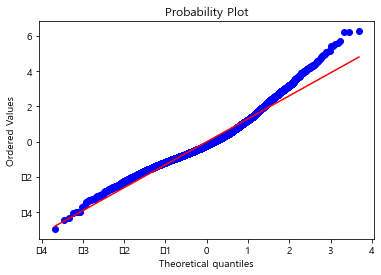

In [39]:
# 잔차의 정규성 확인

import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# 조금 다른 방법으로 회귀분석 수행

res2 = sm.ols(formula='rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부', data = z8)

# 회귀분석 결과에서 잔차만 추출

resid = res2.fit().resid

# Q-Q Plot을 그려서 정규성 확인

from scipy.stats import probplot

plt.figure()
probplot(resid, plot=plt)
plt.show()

## 다중공선성 10 이상 변수 제외, p-value > 0.05 변수 제외

In [40]:
model3 = ols('rent_ua ~ usage_area + 지하총층 + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 주변세대수점수 + 평균월매출금액 + 평균주말매출금액 + 주차가능여부', z8)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     202.5
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:31:35   Log-Likelihood:                -10421.
No. Observations:                6108   AIC:                         2.087e+04
Df Residuals:                    6094   BIC:                         2.096e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8768      0.099     19.006      0.000       1.683       2.070
usage_area    -0.0003   3.35e-05     -8.851      0.000      -0.000      -0.000
지하총층          -0.2973      0.039     -7.545      0.000      -0.374      -0.220
승객수점수       5.201e-06   5.95e-07      8.735      0.000    4.03e-06    6.37e-06
횡단보도거리m       -0.0015      0.000     -3.857      0.000      -0.002      -0.001
건물별전기사용량      2.3e-05   4.46e-06      5.156      0.000    1.43e-05    3.17e-05
본번별평균사용량    1.973e-05   5.31e-06      3.719      0.000    9.33e-06    3.01e-05
건물연차          -0.0063      0.002     -3.690      0.000      -0.010      -0.003
공시지가        2.837e-07   7.98e-09     35.570      0.000    2.68e-07    2.99e-07
가까운아파트총세대수 -9.138e-05   3.66e-05     -2.495      0.013      -0.000   -1.96e-05
주변세대수점수        0.0166      0.006      2.898      0.004       0.005       0.028
평균월매출금액     9.965e-11   1.94e-11      5.143      0.000    6.17e-11    1.38e-10
평균주말매출금액    5.753e-10   1.04e-10      5.525      0.000    3.71e-10    7.79e-10
주차가능여부        -0.1430      0.041     -3.512      0.000      -0.223      -0.063
==============================================================================
Omnibus:                      615.547   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.487
Skew:                           0.759   Prob(JB):                    6.54e-202
Kurtosis:                       4.156   Cond. No.                     7.46e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,usage_area,1.06579
1,지하총층,1.07792
2,승객수점수,1.24263
3,횡단보도거리m,1.06299
4,건물별전기사용량,1.33944
5,본번별평균사용량,1.35441
6,건물연차,1.41169
7,공시지가,1.41096
8,가까운아파트총세대수,1.46620
9,주변세대수점수,1.47930


## MLR

In [42]:
z8.columns

Index(['지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area', 'cont_area',
       'rent_ua', '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차',
       '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료', 'type_근린상가',
       'type_기타상가', 'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부'],
      dtype='object')

In [49]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = z8[['지하총층',  'usage_area', '승객수점수', '횡단보도거리m', '건물별전기사용량', '본번별평균사용량',
       '건물연차', '공시지가', '가까운아파트총세대수', '주변세대수점수', '평균월매출금액', '평균주말매출금액', '주차가능여부']]
y = z8['rent_ua']
       

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
mlr = LinearRegression()
mlr.fit(x_train,y_train)
y_pred = mlr.predict(x_test)

In [50]:
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy import stats

rmse = mean_squared_error(y_pred,y_test)**0.5
error = abs(((y_pred-y_test) / y_test * 100)).mean()

print(rmse, error)

1.3304133567287084 32.59265848666863


In [54]:
slope,intercept,r_value,p_value,stderr = stats.linregress(y_test, y_test)

,실제값,예측값
0,3.22785,3.18465
1,2.63158,3.08151
2,1.26936,2.72897
3,3.31883,2.90526
4,3.79523,4.35156
...,...,...
1217,2.56039,2.90648
1218,3.10000,3.03399
1219,2.30769,2.85187
1220,4.03327,2.71211


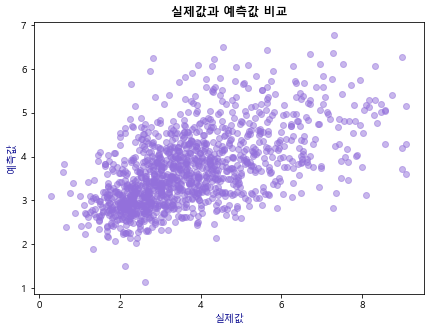

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,5))
plt.scatter(y_test,y_pred, color = 'mediumpurple',alpha=0.5)
plt.title('실제값과 예측값 비교', fontweight = 'bold')
plt.xlabel('실제값', color = 'darkblue')
plt.ylabel('예측값', color = 'darkblue')
fig = plt.gcf()
pd.DataFrame({'실제값':y_test,"예측값":y_pred}).reset_index(drop=True)

In [58]:
from sklearn import metrics
import statsmodels.api as sm
x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.300     
Dependent Variable: rent_ua          AIC:                20870.5535
Date:               2020-10-15 09:38 BIC:                20964.5964
No. Observations:   6108             Log-Likelihood:     -10421.   
Df Model:           13               F-statistic:        202.5     
Df Residuals:       6094             Prob (F-statistic): 0.00      
R-squared:          0.302            Scale:              1.7803    
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const            1.8768    0.0987  19.0056  0.0000   1.6832   2.0704
지하총층            -0.2973    0.0394  -7.5451  0.0000  -0.3745  -0.2200
usage_area      -0.0003    0.0000  -8.8514  0.0000  -0.0004  -0.0002
승객수점수            0.0000    0.0000   8.7350  0.0000   0.0000 